# Understanding Academic Performance Through Ordinary Least Squares & Gradient Descent

## 1) Abstract: Framing the Problem

Machine learning is transforming industries with powerful applications like image recognition, spam detection, and conversational AI. These advancements often rely on *deep learning*, which requires large datasets, significant computational power, and specialized hardware. While deep learning excels in tasks like computer vision and natural language processing, it may not always align with the needs of small- and medium-sized enterprises (SMEs).

*Shallow learning* offers a compelling alternative. By solving well-defined problems with smaller datasets and simpler models, its techniques are faster, more cost-effective, and easier to interpret. Examples include predicting sales revenue (using regression), segmenting customers (with decision trees), and classifying products (via K-nearest neighbors).

This article uses academic performance to help readers see when to use the appropriate method. By focusing on multiple regression, readers can compare the results of ordinary least squares (OLS) to gradient descent (GD). Readers determine both for their suitability (e.g. accuracy, memory usage). It additionally looks at alternative algorithms (e.g. ridge regression) to get a full understanding of what tools are available.

## 2) Introduction: What Is Multiple Regression?

Multiple regression is a statistical technique used to model the relationship between one dependent variable (or label) and two or more independent variables (or features). It is a powerful tool for understanding how changes in independent variables influence the dependent variable.

This modeling approach can be implemented using various strategies, but I will focus on two aforementioned methods:

**Ordinary Least Squares (OLS)**, which derives the solution through pure mathematical analysis by minimizing the sum of squared residuals through matrix operations.\
**Gradient Descent (GD)**, an iterative machine learning optimization algorithm that minimizes the loss function (e.g., mean squared error) by updating parameters step by step using the losses's gradients.

These methods represent two distinct approaches to solving multiple regression problems: analytical (OLS) and computational (GD).

### **Ordinary Least Squares (OLS)**

#### **0) How to Get Started**

We start with the following equation:

$$\boldsymbol{X}\boldsymbol{β} = \boldsymbol{y}$$

Where:

$\boldsymbol{X}$ := The design matrix of independent variables\
$\boldsymbol{β}$ := The vector of parameters (coefficients to be estimated)\
$\boldsymbol{y}$ := The vector of the dependent variable

This is not possible, however, since there is always an error value, known as the *residuals*. 

Thus:

$$\boldsymbol{X}\boldsymbol{\hat{\beta}} + \boldsymbol{\epsilon} = \boldsymbol{\hat{y}}$$

With that in mind, OLS can be derived through various approaches:

#### **1) Optimization using calculus**  

In this scenario, we minimize the norm of $\boldsymbol{y} - \boldsymbol{\hat{y}}$, which will give us the vector of parameters. $$\min_β |\boldsymbol{y} - \boldsymbol{\hat{y}}| = \min_β |\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\hat{β}}|^2$$

I won't do the math for this, but if you're interested, it requires calculus and is a stronger solution since it follows along the maximum likelihood estimation (MLE).

#### **2) Using the Left Inverse**

Because $\boldsymbol{X}\boldsymbol{β}$ is assumed to be full column rank, we can derive $\boldsymbol{β}$.

In other words, if we multiply $\boldsymbol{X}\boldsymbol{β}$ by its transpose, we can then multiply it by its inverse.

Thus:

$$\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{β} = \boldsymbol{X}^T\boldsymbol{y}$$
$$(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{β} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}$$
$$\boldsymbol{I}\boldsymbol{β} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}$$
$$\boldsymbol{β} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}$$

Note:

$\boldsymbol{I}$ = The identity matrix

Because $\boldsymbol{β}$ is predicting $\boldsymbol{y}$, it is better to conclude that this derivation represents $\boldsymbol{\hat{β}}$.

This is not the best approach because we are assuming $\boldsymbol{X}\boldsymbol{β}$ is full column rank, which may not be true if there is **Multicollinearity**.

Why? If one parameter is a linear combination of any of the others, then the design matrix $X$ is not of full column rank (e.g. $\boldsymbol{β}_3 = 4 \cdot \boldsymbol{β}_1$).

#### **3) Transforming $X$ to Row Canonical Form**

The equation

$$\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{β} = \boldsymbol{X}^T\boldsymbol{y}$$

can be row reduced to its canonical form to get the vector of parameters as well.

This will make sense in the next derivation.

#### **4) Using Orthogonal Projections**

$\boldsymbol{X}\boldsymbol{β} = \boldsymbol{y}$ can be seen through the lens of a projection and an orthogonal component.

We can treat the following equation as a projection:
$$\boldsymbol{X}\boldsymbol{\hat{β}} = \boldsymbol{\hat{y}}$$

This is known as $\boldsymbol{\hat{y}}$ projected onto the column space of $\boldsymbol{X}$.

In other words, the *residual* (orthogonal) and *prediction* (projection) add up to the vector of the dependent variable: $\boldsymbol{y}$

That means, $$\boldsymbol{X}\boldsymbol{\beta} + \boldsymbol{\epsilon} = \boldsymbol{y}$$

Note, however, that this equation represents the true data-generating process, but $\boldsymbol{\beta}$ and $\boldsymbol{\epsilon}$ are unknown. Hence, we fit the data to the dependent variable.

Since the linear combinations of the columns of $\boldsymbol{X}$ are projected onto $\boldsymbol{\hat{y}}$, the residual $\boldsymbol{y}$ is orthogonal to the column space:

$\boldsymbol{y} - \boldsymbol{\hat{y}}$ (or $\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\hat{β}}$)

Given that $\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\hat{β}}$ is orthogonal to the column space of $\boldsymbol{X}$, then it's orthogonal to *each* column of $\boldsymbol{X}$:

$$\boldsymbol{X}^T \cdot (\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\hat{β}}) = 0$$
$$\boldsymbol{X}^T\boldsymbol{y} - \boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\hat{β}} = 0$$
$$\boldsymbol{X}^T\boldsymbol{y} = \boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\hat{β}}$$
$$(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y} = \boldsymbol{\hat{β}}$$

We could have solved for that using row reduction, where $\boldsymbol{X}^T\boldsymbol{X}$ is augmented by $\boldsymbol{X}^T\boldsymbol{y}$, then put into row canonical form.

#### **5) Using Factorizations (e.g. QR Factorization, SVD)**

This article will not explore factorizations, but any rectangular matrix can be factorized into other, smaller matrices using various methods. Once factorized, the parameters can be estimated, often as easily as the previous approaches.

#### **Conclusion**

Regardless of which approach you use with OLS, the parameters will be:
$$\boldsymbol{\hat{β}} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}$$

<!-- #### **0) How to Get Started**

With GD, you must decide a cost function, AKA a loss or an objective function.

For multiple regression, we start with the mean square error (MSE) as the cost function (it is most common):

$$MSE = \frac{1}{N} \sum_{i=1}^N (y_i - \beta_0 - \mathbf{x}_i^T \boldsymbol{\beta})^2$$

Where:

*N* := Number of data points\
*y_i* := The vector of the dependent variable\
*β_0* := The scalar of the independent variable's intercept\
*β_i* := The vector of parameters (coefficients to be estimated)\
*x_i* := The vector of independent variables

Note: This has not been put in matrix form because GD uses calculus.

At first, you might think, "How can I calculate the residual without first having values for the parameters?"

GD iteratively determines the parameters' values.

You add the value of the partial derivative of the MSE with regard to the particular parameter:

$$\frac{\partial MSE}{\partial \beta_0} = -\frac{2}{N} \sum_{i=1}^N (y_i - \beta_0 - \mathbf{x}_i^T \boldsymbol{\beta_i})$$

$$\frac{\partial MSE}{\partial {\beta_i}} = -\frac{2}{N} \sum_{i=1}^{N}(y_i - \beta_0 + \mathbf{x}_i^T \boldsymbol{\beta_i}) * x_i$$

Now, let's set the parameters to 0 and add a learning rate (α) and number of times (i.e. epochs) to update each parameter.

$\alpha = 0.01$ will be the learning rate, and $t = 100$ will be the number of epochs.

We want to update the model parameters using the following equations:

$$\beta_0^{t+1} = \beta_0 + \alpha \cdot \frac{\partial MSE}{\partial \beta_0}$$

$$\beta_i^{t+1} = \beta_i + \alpha \cdot \frac{\partial MSE}{\partial \beta_i}$$

Substituting the derivatives we found earlier:

$$\beta_0^{t+1} = \beta_0^{t+1} + 0.01 \cdot (-\frac{2}{N} \sum_{i=1}^{N}(y_i - (\beta_0^{t+1} + \beta_i x_i)))$$

$$\beta_i^{t+1} = \beta_i + 0.01 \cdot (-\frac{2}{N} \sum_{i=1}^{N}(y_i - (\boldsymbol{\beta_0} + \beta_i \boldsymbol{x_i})) \cdot \boldsymbol{x_i})$$

Simplifying the equations:

$$\beta_0^{t+1} = \beta_0 - 0.02 \sum_{i=1}^{N}(y_i - (\boldsymbol{\beta_0} + \beta_i \boldsymbol{x_i}))$$

$$\beta_i^{t+1} = \beta_i - 0.02 \sum_{i=1}^{N}(y_i - (\boldsymbol{\beta_0} + \beta_i \boldsymbol{x_i})) \cdot \boldsymbol{x_i}$$ -->

### **Gradient Descent (GD)**

#### **0) How to Get Started**

To perform Gradient Descent (GD), you must first decide on a cost function, also known as a loss or objective function. Each parameter will iteratively update with the gradient of the cost function.

As the values of the gradient decrease, you get closer to the optimal value of the cost function -- and of the parameters. Unlike conventional optimization, which you may have come across in calculus, GD sets a learning rate by which to update initial values. In addition, you run GD a set number of times, known as epochs, and run the algorithm using a loop (for or while; your choice). You may additionally set a step size; at that point, if one partial derivative is greater than the precision, GD stops. At that point, you've identified the regressor's parameters. 

For multiple regression, we typically use the mean squared error (MSE) as the cost function:
\boldsymbol
<!-- $$MSE = \frac{1}{N} \| \mathbf{y} - \beta_0 \mathbf{1} - \mathbf{X} \boldsymbol{\beta} \|^2$$ -->

$$MSE = \frac{1}{N} \| \boldsymbol{y} - \boldsymbol{X}\boldsymbol{β} \|^2$$
<!-- $$MSE = \frac{1}{N} (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})^{T} * (\mathbf{y} - \mathbf{X} \boldsymbol{\beta})$$ -->

Where:

*N* := Number (scalar) of data points\
$\boldsymbol{y}$ := Vector of dependent variables (N * 1)\
$\boldsymbol{X}$ := Matrix of independent variables (M * N)\
$\boldsymbol{β}$ := Vector of parameters (coefficients to be estimated, N * 1)
<!-- *β_0* := Scalar intercept term\ -->
<!-- *1* := Vector of 1's (n * 1)\ -->

At first, you might think, "How can I calculate the residual without first having values for the parameters?"

GD iteratively determines the parameters' values updating the parameters at each step based on the gradient of the cost function, which, in this case, is the MSE.

You add the value of the partial derivative of the MSE with regard to the particular parameter:

<!-- $$\frac{\partial MSE}{\partial \beta_0} = \frac{2}{N} \mathbf{1}^T (\mathbf{X} \boldsymbol{\beta}^{(t)} + \beta_0 \mathbf{1} - \mathbf{y})$$

$$\frac{\partial MSE}{\partial \boldsymbol{\beta}} = \frac{2}{N} \mathbf{X}^T (\mathbf{X} \boldsymbol{\beta}^{(t)} + \beta_0 \mathbf{1} - \mathbf{y})$$ -->

$$\frac{1}{N} (\boldsymbol{y} - \boldsymbol{X}\boldsymbol{β})^T(\boldsymbol{y} - \boldsymbol{X}\boldsymbol{β})$$

We get the following in its expanded form:
$$\frac{1}{N} \left(||\boldsymbol{y}||^2 - \boldsymbol{β}^T\boldsymbol{X}^T\boldsymbol{y} - \boldsymbol{X}\boldsymbol{β}\boldsymbol{y}^T + ||\boldsymbol{X}||^2\right)$$

Since we are taking the gradient:

- The squared norm of $y$ drops out
- The two middle values are symmetric ($A = A^T$)
- The derivative of the transpose is 2
- The derivative of $β$ alone is 1

Thus, the gradient is:
$$\frac{1}{N} \left(0 - 2\boldsymbol{X}^T\boldsymbol{y} + 2\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{β}\right)$$
The shared term is $2X^T$:
$$\frac{1}{N} \cdot 2\boldsymbol{X}^T \cdot (\boldsymbol{X}\boldsymbol{β} - \boldsymbol{y})$$

This is the gradient for the Mean Squared Error (MSE).

<!-- \frac{\partial MSE}{\partial \boldsymbol{\beta}} =  -->

Now, let's set the parameters to 0 and add the learning rate (α) and epochs (t) to update each parameter.

The updates for the parameters are:

<!-- $$\beta_0^{(t+1)} = \beta_0^{(t)} - \alpha \cdot \frac{\partial MSE}{\partial \beta_0}$$ -->

$$\boldsymbol{β}^{t+1} = \boldsymbol{β}^{t} - \alpha \cdot \frac{\partial MSE}{\partial \boldsymbol{β}}$$

Substituting the derivatives into the update equations:

<!-- $$\beta_0^{(t+1)} = \beta_0^{(t)} - 0.01 \times \frac{2}{N} \mathbf{1}^T (\mathbf{X} \boldsymbol{\beta}^{(t)} + \beta_0 \mathbf{1} - \mathbf{y})$$ -->

$$\boldsymbol{β}^{t+1} = \boldsymbol{β}^t - \alpha \cdot \frac{1}{N} \cdot 2\boldsymbol{X}^T \cdot (\boldsymbol{X}\boldsymbol{β} - \boldsymbol{y})$$

The updated values will run against the epochs.

#### **1) GD with Other Cost Functions**

Depending on what you're trying to achieve (e.g. regression, classification, anomaly detection), you can choose a different cost function. I will not cover each here, but you can find a *partial* list of those cost functions [here](https://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications).

#### **Conclusion**

<!-- The expressions $\beta_0^{(t+1)}$ and $\boldsymbol{\beta}^{(t+1)}$ would give us the intercept and vector of parameters. -->

The expression $\boldsymbol{β}^{t+1}$ will give us the intercept and coefficient as a vector of parameters.

## 3) Methodology: What Do We Know About the Data?

### Gathering the Data

The dataset comes from [Kaggle](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression).

The dataset examines the factors influencing academic student performance, including:
- Hours Studied: The total number of hours spent studying by each student.
- Previous Scores: The scores obtained by students in previous tests.
- Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
- Sleep Hours: The average number of hours of sleep the student had per day.
- Sample Question Papers Practiced: The number of sample question papers the student practiced.

The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

The target variable, performance index, measures each student's overall performance. The index, rounded to the nearest integer, ranges from 10 to 100, with higher values indicating better performance.

In [1]:
# The dataset will come from Kaggle:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression") # Student Performance (Multiple Linear Regression): https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

print("Path to dataset files:", path)

Path to dataset files: /Users/alexdubro/.cache/kagglehub/datasets/nikhil7280/student-performance-multiple-linear-regression/versions/1


### Importing the Necessary Packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import os
import pandas as pd 
from scipy import linalg
import seaborn as sns 
from sklearn import linear_model
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.api as sm
import sys
import time

In [3]:
dataset_path = os.path.join(path, 'Student_Performance.csv')

raw_data = pd.read_csv(dataset_path)
raw_data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


### Cleaning/preprocessing the Data

The data must be cleaned/preprocessed for duplicates and null values.

In [4]:
# 1) Removing null data

raw_data.dropna(inplace=True)

# 2) Removing duplicates

raw_data.drop_duplicates(inplace=True)

Because there is a categorical variable, the data must be dummy coded. This will be done using using one-hot encoding.

In [5]:
raw_data['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     4986
Yes    4887
Name: count, dtype: int64

In [6]:
updated_data = pd.get_dummies(raw_data, columns=['Extracurricular Activities'], dtype=int)
updated_data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,0,1
1,4,82,4,2,65.0,1,0
2,8,51,7,2,45.0,0,1
3,5,52,5,2,36.0,0,1
4,7,75,8,5,66.0,1,0


Now, we need to separate the target into its target (dependent) variable, Performance Index, and the predictors (independent variables). For OLS, a column of 1's will be stacked to the left for the intercept.

In [7]:
# Targeting data

y = updated_data['Performance Index']

X_extracurricular_yes = updated_data.drop(['Performance Index', 'Extracurricular Activities_No'], axis=1)
X_with_intercept_yes = np.column_stack([np.ones(len(X_extracurricular_yes)), X_extracurricular_yes])
cols_yes = ['Intercept'] + X_extracurricular_yes.columns.tolist()

X_extracurricular_no = updated_data.drop(['Performance Index', 'Extracurricular Activities_Yes'], axis=1)
X_with_intercept_no = np.column_stack([np.ones(len(X_extracurricular_no)), X_extracurricular_no])
cols_no = ['Intercept'] + X_extracurricular_no.columns.tolist()

### Visualizing the Data

What do know about the students?

In [8]:
updated_data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651,0.505014,0.494986
std,2.589081,17.325601,1.697683,2.867202,19.208570,0.500000,0.500000
min,1.000000,40.000000,4.000000,0.000000,10.000000,0.000000,0.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000,0.000000,0.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000,1.000000,0.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000,1.000000,1.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000,1.000000,1.000000


Here are a few highlights:
- Students mostly study about ~5 hours.
- Their scores previously are ~70.
- They get ~7 hours of sleep per day.
- Roughly half participate in extracurricular activities (and roughly half do not).

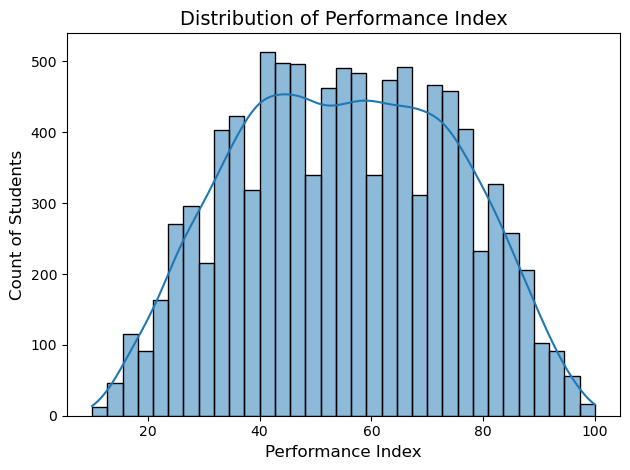

In [9]:
sns.histplot(x='Performance Index', data=updated_data, kde=True)
plt.xlabel('Performance Index', fontsize=12)
plt.ylabel('Count of Students', fontsize=12)
plt.title('Distribution of Performance Index', fontsize=14)
plt.tight_layout()
plt.show()

As expected, their performance index follows nearly a bell curve (normal distribution). Most performance indices lie between 40 to 80.

In [10]:
mask = np.zeros_like(updated_data.corr())
upper_triangle = np.triu_indices_from(mask)
mask[upper_triangle] = True
mask

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

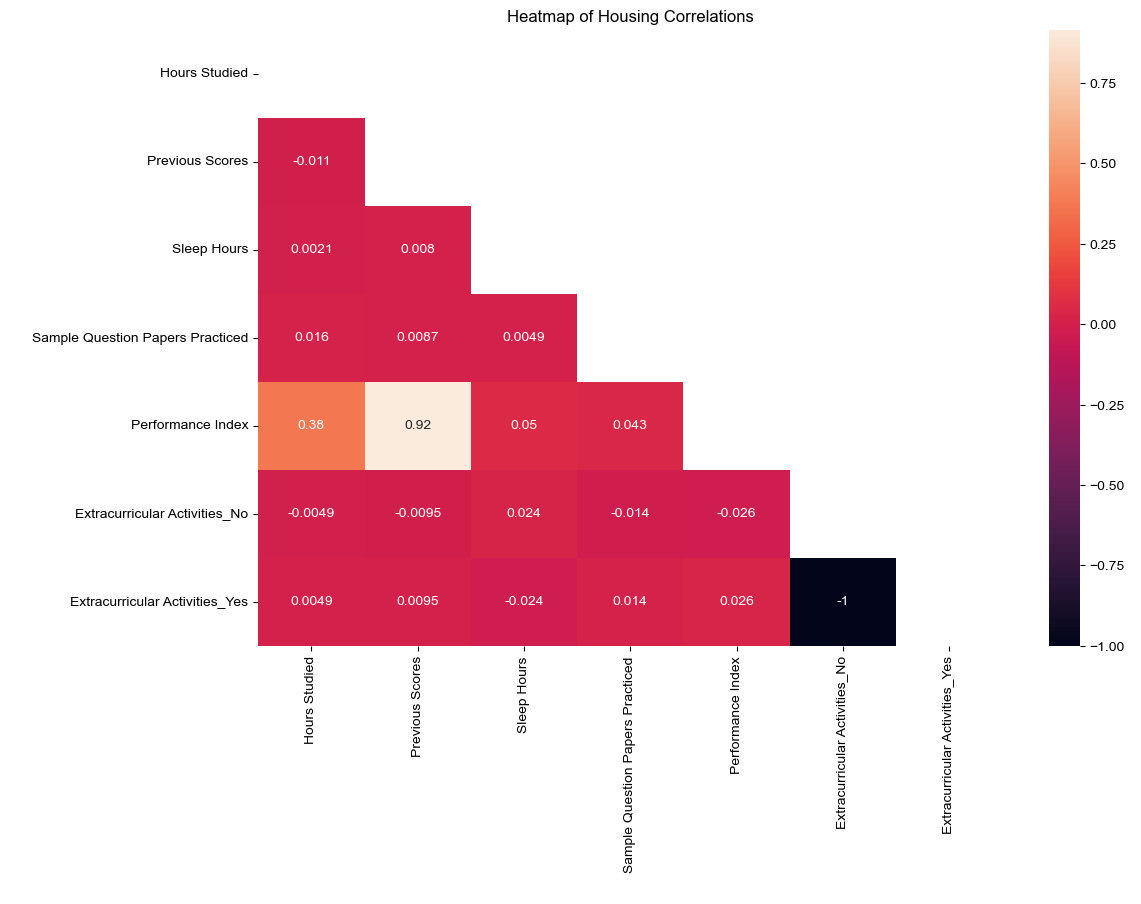

In [11]:
plt.figure(figsize=(12, 8))

sns.heatmap(updated_data.corr(), mask=mask, annot=True).set(title='Heatmap of Housing Correlations')
sns.set_style('white')
plt.show()

Extracurricular activities, whether students are active or not, is perfectly negatively correlated. However, that is why the data has been dummy coded.

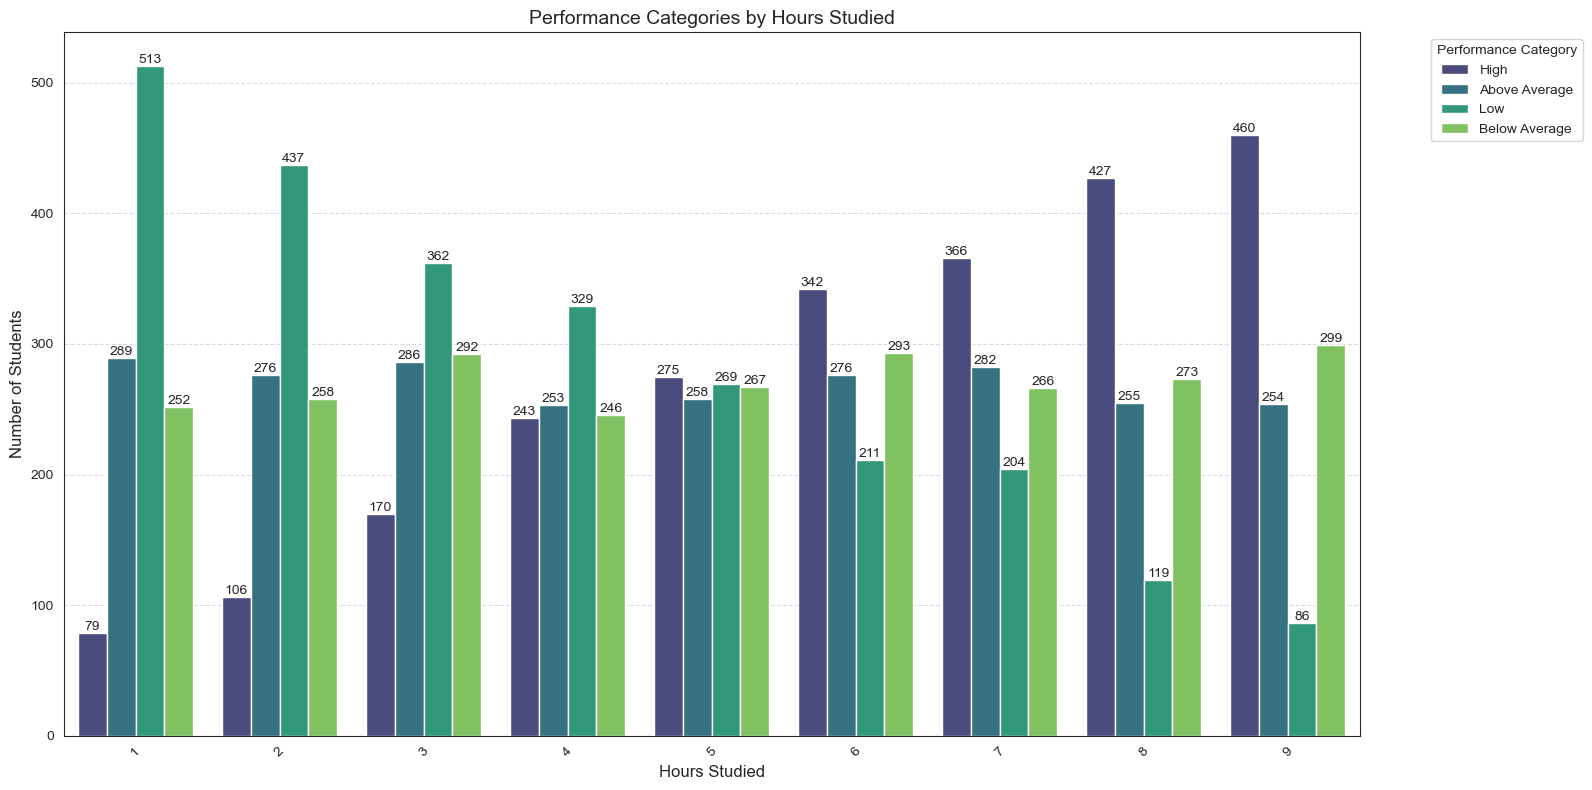

Performance Category Thresholds:
Q1 (25th percentile): 40.00
Median (50th percentile): 55.00
Q3 (75th percentile): 70.00

Performance Category Distribution:
Performance Category
Low              2530
High             2468
Below Average    2446
Above Average    2429
Name: count, dtype: int64

Percentage Distribution:
Performance Category
Low              25.625443
High             24.997468
Below Average    24.774638
Above Average    24.602451
Name: proportion, dtype: float64


In [12]:
# Calculate quartiles for more meaningful categorization
q1 = updated_data['Performance Index'].quantile(0.25)
q2 = updated_data['Performance Index'].quantile(0.5)  # Median
q3 = updated_data['Performance Index'].quantile(0.75)

# Create Performance Category column with more granular categories
def categorize_performance(performance):
    if performance <= q1:
        return 'Low'
    elif performance <= q2:
        return 'Below Average'
    elif performance <= q3:
        return 'Above Average'
    else:
        return 'High'

updated_data['Performance Category'] = updated_data['Performance Index'].apply(categorize_performance)

# Create the plot
plt.figure(figsize=(16, 8))
sns.countplot(
    data=updated_data,
    x='Hours Studied',
    hue='Performance Category',
    palette='viridis',
    order=sorted(updated_data['Hours Studied'].unique())
)

# Customize plot
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Performance Categories by Hours Studied', fontsize=14)
plt.legend(title='Performance Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add value annotations on top of each bar
for container in plt.gca().containers:
    plt.gca().bar_label(container)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

# Print detailed information
print("Performance Category Thresholds:")
print(f"Q1 (25th percentile): {q1:.2f}")
print(f"Median (50th percentile): {q2:.2f}")
print(f"Q3 (75th percentile): {q3:.2f}")
print("\nPerformance Category Distribution:")
print(updated_data['Performance Category'].value_counts())
print("\nPercentage Distribution:")
print(updated_data['Performance Category'].value_counts(normalize=True) * 100)

## 4) Findings/Results: Analysis Using OLS & GD 

Let's track how each algorithm does so that we can compare them.

We'll store the coefficients here:

In [13]:
comparison_extracurricular_yes = pd.DataFrame()
comparison_extracurricular_yes.attrs['title'] = 'Comparison of Extracurricular - Yes Activities'

comparison_extracurricular_no = pd.DataFrame()
comparison_extracurricular_no.attrs['title'] = 'Comparison of Extracurricular - No Activities'

And we'll store the performance here:

In [14]:
performance_metrics_yes = pd.DataFrame()
performance_metrics_yes.attrs['title'] = 'Performance Metrics - Yes Activities'
performance_metrics_yes.index = ['elapsed time', 'memory usage']

performance_metrics_no = pd.DataFrame()
performance_metrics_no.attrs['title'] = 'Performance Metrics - No Activities'
performance_metrics_no.index = ['elapsed time', 'memory usage']

### Ordinary Least Squares (OLS)

We will be using the following equation to derive the parameters for OLS:

$$\boldsymbol{\hat{β}} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}
$$

We will compare results between NumPy, SciPy, and Statsmodels.

##### NumPy

In [15]:
def numpy_parameters(features, label, key, cols):

    # Start timing
    start_time = time.time()

    # Compute beta coefficients and Series for both cases
    beta_encoding = np.linalg.inv(features.T @ features) @ features.T @ label
    beta_series = pd.Series(data=beta_encoding, index=cols)

    elapsed_time = time.time() - start_time

    # Measure memory usage (using one example as memory usage should be similar)
    beta_memory = sys.getsizeof(beta_encoding)
    series_memory = sys.getsizeof(beta_series)

    # Display results
    print(f"Computed beta coefficients in {elapsed_time:.6f} seconds")
    print(f"Memory usage for parameters of \f'{key}' variable: {beta_memory} bytes")
    print(f"Memory usage for \f'{key}' variable Series: {series_memory} bytes")

    # Optionally, display the coefficients for both cases
    print(f"Beta coefficients {key}:")
    print(beta_series)

    return elapsed_time, beta_memory, beta_series

time_numpy_yes, memory_numpy_yes, numpy_yes = numpy_parameters(X_with_intercept_yes, y, 'yes', cols_yes)
time_numpy_no, memory_numpy_no, numpy_no = numpy_parameters(X_with_intercept_no, y, 'no', cols_no)

Computed beta coefficients in 0.001073 seconds
Memory usage for parameters of 'yes' variable: 160 bytes
Memory usage for 'yes' variable Series: 516 bytes
Beta coefficients yes:
Intercept                          -34.068915
Hours Studied                        2.852729
Previous Scores                      1.018319
Sleep Hours                          0.480321
Sample Question Papers Practiced     0.193910
Extracurricular Activities_Yes       0.616693
dtype: float64
Computed beta coefficients in 0.001189 seconds
Memory usage for parameters of 'no' variable: 160 bytes
Memory usage for 'no' variable Series: 515 bytes
Beta coefficients no:
Intercept                          -33.452221
Hours Studied                        2.852729
Previous Scores                      1.018319
Sleep Hours                          0.480321
Sample Question Papers Practiced     0.193910
Extracurricular Activities_No       -0.616693
dtype: float64


In [16]:
# Add NumPy's coefficients

comparison_extracurricular_yes['NumPy OLS'] = numpy_yes
comparison_extracurricular_no['NumPy OLS'] = numpy_no

# Add NumPy's performance

performance_metrics_yes['NumPy'] = [time_numpy_yes, memory_numpy_yes]
performance_metrics_no['NumPy'] = [time_numpy_no, memory_numpy_no]

SciPy's is much closer to statsmodels, though its elapsed time is much higher; the memory usage is the same.

While the elapsed time might not seem like much here, a difference nearly twice as large can make a difference with a dataset with millions of data points.

##### SciPy

In [17]:
def scipy_parameters(features, label, key, cols):

    # Start timing
    start_time = time.time()

    # Compute beta coefficients and Series for both cases
    beta_encoding = linalg.inv(features.T @ features) @ features.T @ label
    beta_series = pd.Series(data=beta_encoding, index=cols)

    elapsed_time = time.time() - start_time

    # Measure memory usage (using one example as memory usage should be similar)
    beta_memory = sys.getsizeof(beta_encoding)
    series_memory = sys.getsizeof(beta_series)

    # Display results
    print(f"Computed beta coefficients in {elapsed_time:.6f} seconds")
    print(f"Memory usage for parameters of \f'{key}' variable: {beta_memory} bytes")
    print(f"Memory usage for \'Yes' variable Series: {series_memory} bytes")

    # Optionally, display the coefficients for both cases
    print(f"Beta coefficients {key}:")
    print(beta_series)

    return elapsed_time, beta_memory, beta_series

time_scipy_yes, memory_scipy_yes, scipy_yes = scipy_parameters(X_with_intercept_yes, y, 'yes', cols_yes)
time_scipy_no, memory_scipy_no, scipy_no = scipy_parameters(X_with_intercept_no, y, 'no', cols_no)

Computed beta coefficients in 0.000512 seconds
Memory usage for parameters of 'yes' variable: 160 bytes
Memory usage for 'Yes' variable Series: 516 bytes
Beta coefficients yes:
Intercept                          -34.068915
Hours Studied                        2.852729
Previous Scores                      1.018319
Sleep Hours                          0.480321
Sample Question Papers Practiced     0.193910
Extracurricular Activities_Yes       0.616693
dtype: float64
Computed beta coefficients in 0.001476 seconds
Memory usage for parameters of 'no' variable: 160 bytes
Memory usage for 'Yes' variable Series: 515 bytes
Beta coefficients no:
Intercept                          -33.452221
Hours Studied                        2.852729
Previous Scores                      1.018319
Sleep Hours                          0.480321
Sample Question Papers Practiced     0.193910
Extracurricular Activities_No       -0.616693
dtype: float64


In [18]:
# Add SciPy's coefficients

comparison_extracurricular_yes['SciPy OLS'] = scipy_yes
comparison_extracurricular_no['SciPy OLS'] = scipy_no

# Add SciPy's performance

performance_metrics_yes['SciPy'] = [time_scipy_yes, memory_scipy_yes]
performance_metrics_no['Scipy'] = [time_scipy_no, memory_scipy_no]

In [19]:
performance_metrics_no

,NumPy,Scipy
elapsed time,0.001189,0.001476
memory usage,160.000000,160.000000


What about the $R^2$ and $F$-Test?

$R^2$ is calculated by subtracting 1 from residual sum of squares divided by the total sum of squares.

In [20]:
def r_squared(data, key, beta_param=None):

    start_time = time.time()

    arr_result = data @ beta_param
    y_i = np.array(y)
    squared_res = ((y_i - arr_result)**2)
    ss_res = sum(squared_res)

    y_mean = updated_data['Performance Index'].mean()
    y_mean_repeated = np.repeat(y_mean, y_i.shape[0])
    squared_tot = ((y_i - y_mean_repeated)**2)
    ss_tot = sum(squared_tot)

    r_squared = 1 - (ss_res/ss_tot)

    elapsed_time = time.time() - start_time

    # Display results
    print(f"Computed beta coefficients in {elapsed_time:.6f} seconds")
    print(f"Memory usage for {key}: {sys.getsizeof(r_squared)} bytes")

    print("R^2 statistic:", r_squared)

r_squared(X_with_intercept_yes, 'yes', scipy_yes)
r_squared(X_with_intercept_no, 'no', scipy_no)

Computed beta coefficients in 0.003935 seconds
Memory usage for yes: 32 bytes
R^2 statistic: 0.9886813814840943
Computed beta coefficients in 0.003524 seconds
Memory usage for no: 32 bytes
R^2 statistic: 0.9886813814840943


The $F$-Test can be calculated in two ways. We will be using the one requiring the sum of squares rather than $R^2$ in order to *not* rely on another statistic.

In [21]:
def f_test(data, key, beta_param=None):

    # Start timing
    start_time = time.time()

    y_mean = y.mean()
    y_pred = np.dot(data, beta_param)
    ss_reg = sum((y_pred - y_mean) ** 2)

    # Calculate SS_res (unexplained variance)
    ss_res = sum((y - y_pred) ** 2)

    # Number of predictors (k) and observations (n)
    n = len(y)
    k = data.shape[1] - 1  # Exclude intercept

    # F-statistic calculation
    numerator = ss_reg / k
    denominator = ss_res / (n - k - 1)
    f_test = numerator / denominator

    print("F-test statistic:", f_test)

    elapsed_time = time.time() - start_time

    # Display results
    print(f"Computed beta coefficients in {elapsed_time:.6f} seconds")
    print(f"Memory usage for: {sys.getsizeof(f_test)} bytes")

f_test(X_with_intercept_yes, 'yes', scipy_yes)
f_test(X_with_intercept_no, 'no', scipy_no)

F-test statistic: 172376.499435771
Computed beta coefficients in 0.002872 seconds
Memory usage for: 32 bytes
F-test statistic: 172376.4994357717
Computed beta coefficients in 0.002295 seconds
Memory usage for: 32 bytes


How do the results of NumPy and ScIpy compare to those of statsmodels?

#### Statsmodels

In [22]:
def statsmodels(features, label):
    start_time = time.time()

    X_constant = sm.add_constant(features)
    model = sm.OLS(label, X_constant).fit()
    summary = model.summary()

    elapsed_time = time.time() - start_time
    memory_usage = sys.getsizeof(model)

    # Display results
    print(f"Computed beta coefficients in {elapsed_time:.6f} seconds")
    print(f"Memory usage for: {memory_usage} bytes")
    print("\nModel Summary:")
    print(summary)

    return elapsed_time, memory_usage, model, summary

# Unpack both the model and summary
time_statsmodels_yes, memory_statsmodels_yes, statsmodels_yes_model, statsmodels_yes_summary = statsmodels(X_extracurricular_yes, y)
time_statsmodels_no, memory_statsmodels_no, statsmodels_no_model, statsmodels_no_summary = statsmodels(X_extracurricular_no, y)

Computed beta coefficients in 0.011251 seconds
Memory usage for: 48 bytes

Model Summary:
                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.724e+05
Date:                Thu, 02 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:10:29   Log-Likelihood:                -21065.
No. Observations:                9873   AIC:                         4.214e+04
Df Residuals:                    9867   BIC:                         4.219e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [23]:
# Add Statsmodels's coefficients

comparison_extracurricular_yes['statsmodels'] = statsmodels_yes_model.params.values
comparison_extracurricular_no['statsmodels'] = statsmodels_no_model.params.values

# Add Statsmodels's performance

performance_metrics_yes['Statsmodels'] = [time_statsmodels_yes, memory_statsmodels_yes]
performance_metrics_no['Statsmodels'] = [time_statsmodels_no, memory_statsmodels_no]

SciPy's coefficients are fairly close! The $R^2$ is as well. While the F-tests are both very high, their differences are pronounced. This may be due to numerical stability, differences in computational approaches and degrees of freedom, how the intercept is handled by each, and exclusion of multicollinear terms by statsmodels.

The memory usage for SciPy and NumPy are much higher, by a rate of 19. Statsmodels is 2.5 times as fast as SciPy's as well. 

While the speed isn't much of a difference, the memory usage can become an issue if a dataset had 1 million rows. 

Overall, we have a robust model, though it's much more robust when using SciPy. 

How does OLS compare to GD?

## Gradient Descent (GD)

### Conventional GD

It should be *emphasized* that the results of GD will likely be different because it relies on a training set, namely a smaller dataset of the data. In other words, it finds the parameters as the dataset grows, whereas OLS is much more static since it provides the parameters as given; not as they change. That can seriously affect the accuracy of the results.

Nonetheless, let's take a look.

We will be using an equation similar to this one to derive the parameters for GD:

<!-- $$\beta_0^{(t+1)} = \beta_0^{(t)} - 0.01 \times \frac{2}{N} {1}^T (\mathbf{X} \boldsymbol{\beta}^{(t)} + \beta_0 \mathbf{1} - \mathbf{y})$$ -->

<!-- $$\boldsymbol{\beta}^{(t+1)} = \boldsymbol{\beta}^{(t)} - 0.01 \times \frac{2}{N} \mathbf{X}^T (\mathbf{X} \boldsymbol{\beta}^{(t)} + \beta_0 \mathbf{1} - \mathbf{y})$$ -->

$$\boldsymbol{β}^{t+1} = \boldsymbol{β}^t - 0.01 \cdot \frac{1}{N} \cdot 2\boldsymbol{X}^T \cdot (\boldsymbol{X}\boldsymbol{β} - \boldsymbol{y})$$

There are several types of scaling (i.e. regularization) that can be used as well. They can be applied in the function should you like.

You have the option to use one of the following two: min-max scaling (normalization) and standardization:
- **Normalization** scales the data to a specific range, which will be 0 (min) and 1 (max), hence the term min-max scaling.
- **Standardization** scales the data to have a mean of 0 and a standard deviation of 1, hence the term Z-score scaling.

In [24]:
def gradient_descent(features, label, cols, initial_learning_rate, epochs, precision, lr_schedule, early_stopping_rounds, decay_rate=None):
    """
    Gradient descent with optional adaptive learning rate
    
    Parameters:
        lr_schedule: str, options are 'constant', 'decay', 'adaptive'
    """
    X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=10)
    scaling = input('Do you want to scale (normalization, standardization, or no)? ') # Regularization
    
    start_time = time.time()
    
    if scaling.lower() == 'normalization':
        scaler = MinMaxScaler()
    elif scaling.lower() == 'standardization':
        scaler = StandardScaler()
    elif scaling.lower() == 'no':
        scaler = None
    else:
        print('Sorry, that is not a valid response.')
        return None, None, None

    if scaler:
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

    # 1. INITIALIZATION TRACKERS:
    guesses = []          # Store all beta coefficients tried during training
    train_losses = []     # Store loss value at each epoch
    learning_rates = []   # Store learning rate values at each epoch

    # Add column of 1s for intercept term and create initial beta values
    X_train_augmented = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # Add intercept column
    beta = np.zeros(X_train_augmented.shape[1])  # Start all coefficients at 0

    # 2. TRACKING VARIABLES:
    best_train_loss = float('inf')  # Store best loss seen so far - start at infinity so first loss will be "better"
    prev_loss = float('inf')        # Store previous epoch's loss for comparison with current loss
    rounds_without_improvement = 0   # Count epochs without loss improvement - used for early stopping
    current_lr = initial_learning_rate  # Track current learning rate value
    best_beta = None                # Store best coefficients found so far

    # 3. MAIN TRAINING LOOP:
    for epoch in range(epochs):
        # Make predictions using current beta coefficients
        train_predictions = X_train_augmented @ beta  # Matrix multiplication of features and coefficients
        
        # Calculate error
        train_residuals = train_predictions - y_train  # Difference between predictions and true values
        train_loss = np.mean(train_residuals ** 2)    # Mean squared error - average of squared differences
        train_losses.append(train_loss)               # Store loss for tracking progress

        # 4. LEARNING RATE SCHEDULES:
        if lr_schedule == 'constant':
            # Simplest approach: keep same learning rate throughout training
            current_lr = initial_learning_rate

        elif lr_schedule == 'decay':
            # Decrease learning rate every decay_rate epochs
            if epoch % decay_rate == 0:
                current_lr *= 0.95  # Reduce by 5%

        elif lr_schedule == 'adaptive':
            smoothing_factor = 0.9  # Prevents sudden learning rate changes
            if train_loss < prev_loss:  # If loss is improving
                # Try increasing learning rate, but don't exceed initial rate
                proposed_lr = min(current_lr * 1.05, initial_learning_rate)
            else:
                # If loss not improving, decrease learning rate but don't go below minimum
                proposed_lr = max(current_lr * 0.95, 1e-6)  # Don't go below 1e-6
            
            # Smooth the change to prevent oscillation
            current_lr = smoothing_factor * current_lr + (1 - smoothing_factor) * proposed_lr

        learning_rates.append(current_lr)
        prev_loss = train_loss

        # 5. UPDATE COEFFICIENTS:
        # Calculate gradient (direction of steepest increase in loss)
        gradient = (2 / len(y_train)) * X_train_augmented.T @ train_residuals

        # Update beta in opposite direction of gradient
        beta = beta - current_lr * gradient
        guesses.append(beta.copy())  # Store this attempt

        # 6. IMPROVEMENT TRACKING:
        # This tracks if we're still finding better solutions
        if train_loss < best_train_loss:  # If we found better coefficients
            best_train_loss = train_loss   # Update best loss
            best_beta = beta.copy()        # Store these better coefficients
            rounds_without_improvement = 0  # Reset counter since we improved
        else:
            # Loss didn't improve
            rounds_without_improvement += 1  # One more round without improvement

        # 7. STOPPING CONDITIONS:
        # Stop if changes become very small (convergence)
        step_size = np.max(np.abs(gradient))
        if step_size < precision:
            print(f"Converged at epoch {epoch}")
            break

        # Stop if we've gone too long without improvement (early stopping)
        if rounds_without_improvement >= early_stopping_rounds:
            print(f"Early stopping triggered")
            beta = best_beta  # Use the best coefficients we found
            break

    elapsed_time = time.time() - start_time
    beta_series = pd.Series(data=beta, index=cols)
    memory_usage = sys.getsizeof(beta_series)

    # Display final results
    print(f"\nTraining completed in {elapsed_time:.2f} seconds")
    print(f'Memory usage: {memory_usage} bytes')
    print(f"Final train loss: {train_losses[-1]:.8f}")
    print(f"Final learning rate: {current_lr:.8f}")
    print("\nFinal coefficients:")
    print(beta_series)

    # Visualization with learning rate
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Training and Test Loss
    plt.subplot(1, 3, 1)
    plt.plot(train_losses, label="Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.title("Training and Test Loss Over Time")
    plt.legend()
    
    # Plot 2: Learning Rate Analysis
    plt.subplot(1, 3, 2)
    loss_diffs = np.diff(train_losses)
    plt.plot(loss_diffs, label="Loss Change")
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Epochs")
    plt.ylabel("Loss Change")
    plt.title("Loss Change Between Epochs")
    plt.legend()
    
    # Plot 3: Learning Rate Over Time
    plt.subplot(1, 3, 3)
    plt.plot(learning_rates, label="Learning Rate")
    plt.xlabel("Epochs")
    plt.ylabel("Learning Rate")
    plt.title("Learning Rate Over Time")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

    return {
        "beta_series": beta_series,
        "elapsed_time": elapsed_time,
        "memory_usage": memory_usage,
        "guesses": guesses,
        "train_losses": train_losses
    }

Converged at epoch 803

Training completed in 0.12 seconds
Memory usage: 516 bytes
Final train loss: 4.12543454
Final learning rate: 0.01000000

Final coefficients:
Intercept                           55.145222
Hours Studied                        7.393311
Previous Scores                     17.723736
Sleep Hours                          0.819051
Sample Question Papers Practiced     0.531404
Extracurricular Activities_Yes       0.298875
dtype: float64


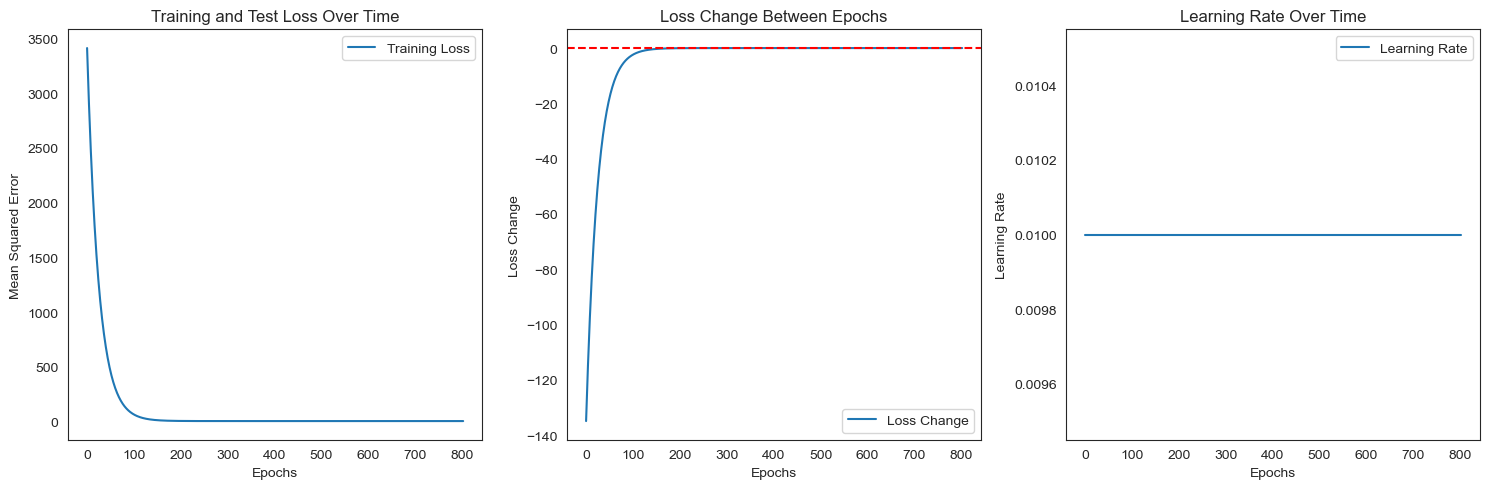

Early stopping triggered

Training completed in 0.37 seconds
Memory usage: 516 bytes
Final train loss: 79.18355029
Final learning rate: 0.00000000

Final coefficients:
Intercept                           46.973888
Hours Studied                        6.239403
Previous Scores                     15.074701
Sleep Hours                          0.735716
Sample Question Papers Practiced     0.553012
Extracurricular Activities_Yes       0.267709
dtype: float64


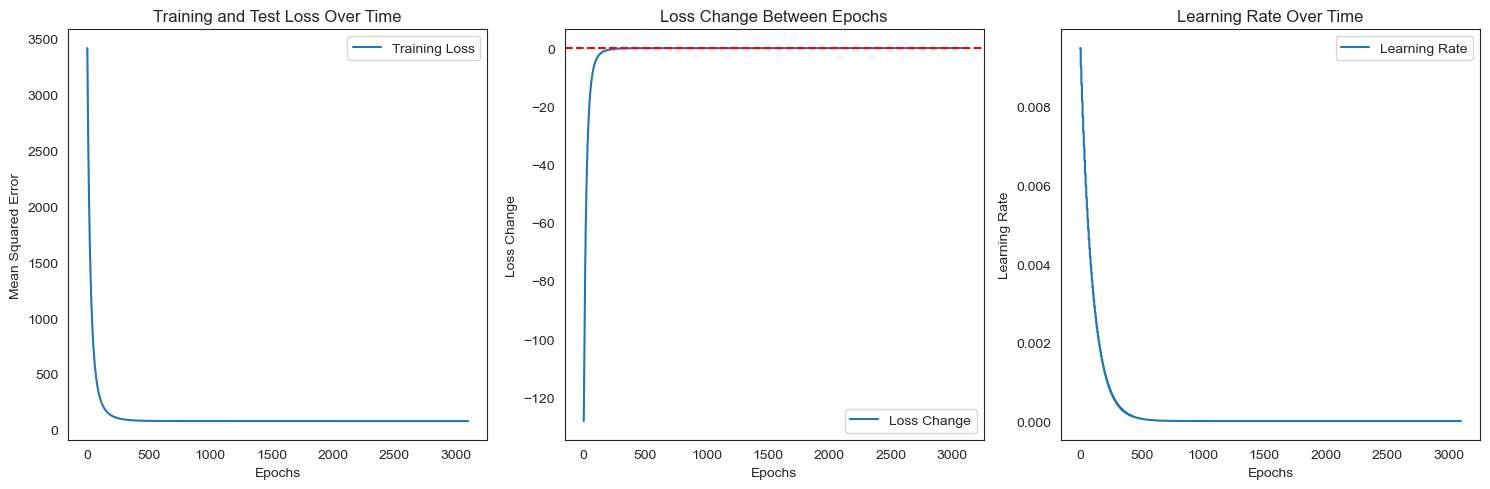

Converged at epoch 803

Training completed in 0.16 seconds
Memory usage: 516 bytes
Final train loss: 4.12543454
Final learning rate: 0.01000000

Final coefficients:
Intercept                           55.145222
Hours Studied                        7.393311
Previous Scores                     17.723736
Sleep Hours                          0.819051
Sample Question Papers Practiced     0.531404
Extracurricular Activities_Yes       0.298875
dtype: float64


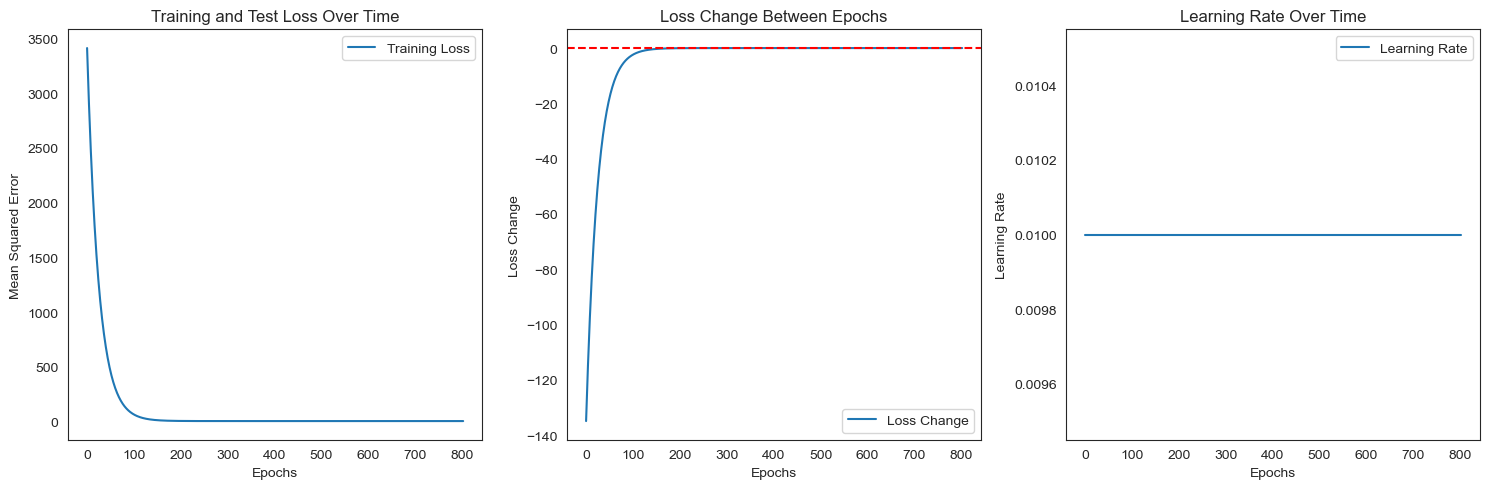

In [25]:
# Constant learning rate (original behavior)
constant_yes = gradient_descent(X_extracurricular_yes, y, cols_yes, 
                         initial_learning_rate=0.01,
                         epochs=50000,
                         precision=0.00001,
                         early_stopping_rounds=10,
                         lr_schedule='constant')

# Decaying learning rate
decay_yes = gradient_descent(X_extracurricular_yes, y, cols_yes, 
                         initial_learning_rate=0.01,
                         epochs=50000,
                         precision=0.00001,
                         early_stopping_rounds=10,
                         lr_schedule='decay',
                         decay_rate=5)

# Adaptive learning rate -- 
adaptive_yes = gradient_descent(X_extracurricular_yes, y, cols_yes, 
                         initial_learning_rate=0.01,
                         epochs=50000,
                         precision=0.00001,
                         early_stopping_rounds=10,
                         lr_schedule='adaptive')

Converged at epoch 803

Training completed in 0.12 seconds
Memory usage: 515 bytes
Final train loss: 4.12543454
Final learning rate: 0.01000000

Final coefficients:
Intercept                           55.145222
Hours Studied                        7.393311
Previous Scores                     17.723736
Sleep Hours                          0.819051
Sample Question Papers Practiced     0.531404
Extracurricular Activities_No       -0.298875
dtype: float64


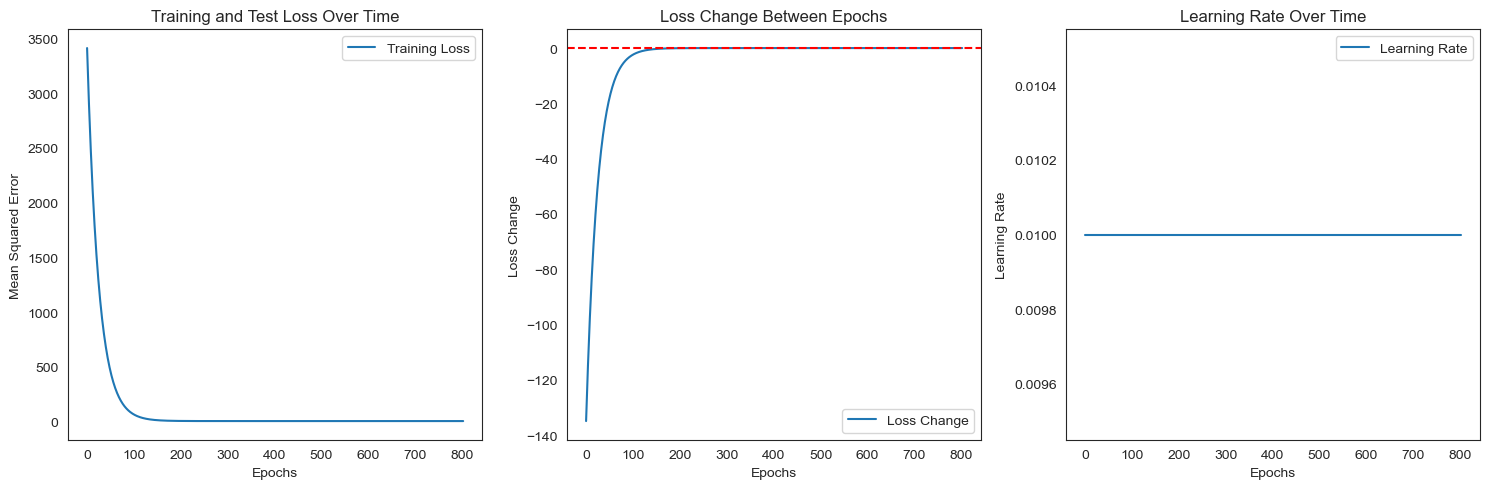

Early stopping triggered

Training completed in 0.79 seconds
Memory usage: 515 bytes
Final train loss: 79.18355029
Final learning rate: 0.00000000

Final coefficients:
Intercept                           46.973888
Hours Studied                        6.239403
Previous Scores                     15.074701
Sleep Hours                          0.735716
Sample Question Papers Practiced     0.553012
Extracurricular Activities_No       -0.267709
dtype: float64


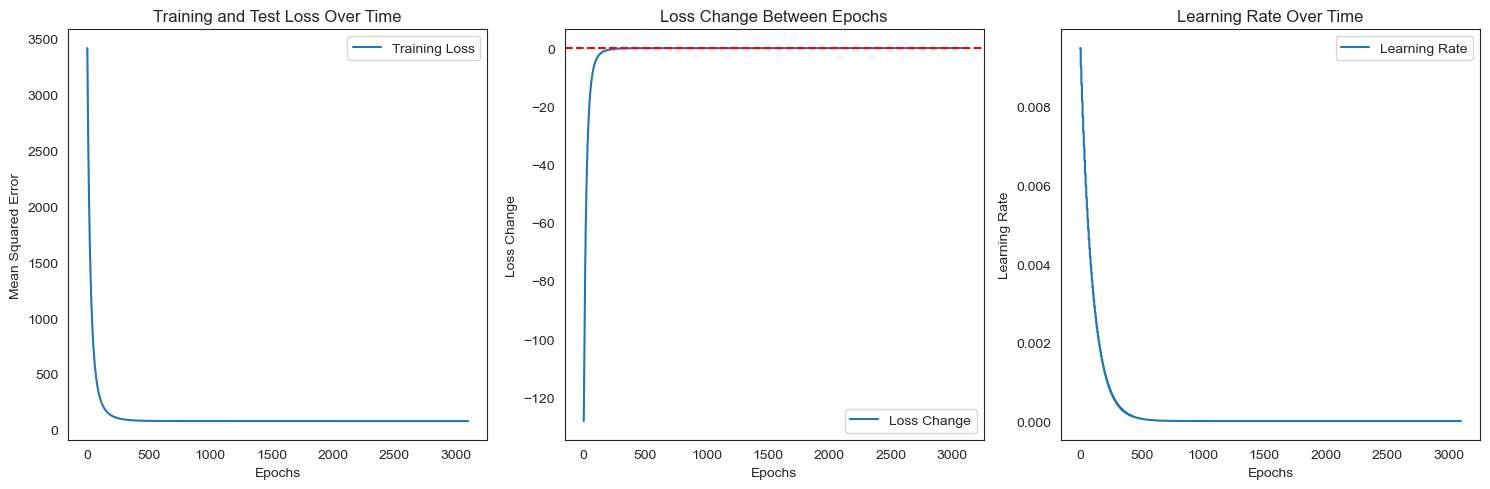

Converged at epoch 803

Training completed in 0.10 seconds
Memory usage: 515 bytes
Final train loss: 4.12543454
Final learning rate: 0.01000000

Final coefficients:
Intercept                           55.145222
Hours Studied                        7.393311
Previous Scores                     17.723736
Sleep Hours                          0.819051
Sample Question Papers Practiced     0.531404
Extracurricular Activities_No       -0.298875
dtype: float64


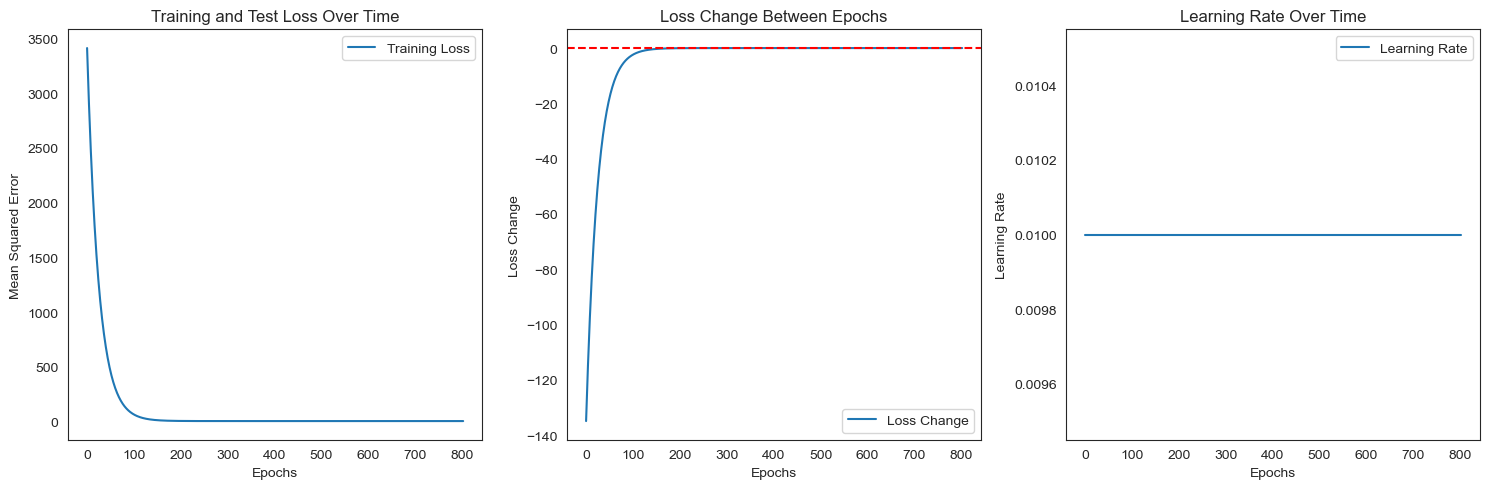

In [26]:
# Constant learning rate (original behavior)
constant_no = gradient_descent(X_extracurricular_no, y, cols_no, 
                         initial_learning_rate=0.01,
                         epochs=50000,
                         precision=0.00001,
                         early_stopping_rounds=10,
                         lr_schedule='constant')

# Decaying learning rate
decay_no = gradient_descent(X_extracurricular_no, y, cols_no, 
                         initial_learning_rate=0.01,
                         epochs=50000,
                         precision=0.00001,
                         early_stopping_rounds=10,
                         lr_schedule='decay',
                         decay_rate=5)

# Adaptive learning rate -- 
adaptive_no = gradient_descent(X_extracurricular_no, y, cols_no, 
                         initial_learning_rate=0.01,
                         epochs=50000,
                         precision=0.00001,
                         early_stopping_rounds=10,
                         lr_schedule='adaptive')

In [27]:
# Add Standardized Gradient Descent's coefficients

comparison_extracurricular_yes['Standardized GD'] = adaptive_yes['beta_series'] # Coefficients
comparison_extracurricular_no['Standardized GD'] = adaptive_no['beta_series'] # Coefficients

# Add Standardized Gradient Descent's performance

performance_metrics_yes['Standardized GD'] = [adaptive_yes['elapsed_time'], adaptive_yes['memory_usage']] # Elapsed time, Memory usage
performance_metrics_no['Standardized GD'] = [adaptive_no['elapsed_time'], adaptive_no['memory_usage']] # Elapsed time, Memory usage


**Gradient descent leads to significantly different results.**

If you have read up on gradient descent, you would know its issues:
- **Tuning**: Finding the right learning rate, epochs, initial values, and precision can be very difficult. In fact, as we saw here, it did not lead to the correct value for CGD. In such a case, using OLS is the better choice.
- **Convergence**: The features can be laid out on a cartesian coordinate system, and its label should lead you to the parameters that, when multiplied by the features, should arrive there. However, there are often local minima or saddle points that stop the gradient from decreasing in value. In other words, optimization *has* occured; just at the wrong point.
- **Visualization**: When you have more than 3 parameters, it is impossible to visualize the loss function. You're stuck guessing when you're tuning. 
- **Loss functions**: Not all loss functions are made equal. While the mean square error was used, there are others, including the root mean sqare error and absolute mean error. It's difficult to choose which fits your data.
- **Choosing GD**: There are multiple forms of gradient descent. There's stochastic, batch, mini-batch, momentum, nesterov, etc. How do you choose which one fits your model? You're left hoping that you chose the right loss function and gradient descent version.

With the MSE, the loss converges after a certain number of epochs. However, we do not know if it reflects the *accurate* parameters; just the ones I've set using the predetermined learning rate, precision, and epochs.

None of our training data sets gives parameters that reflect what statsmodels and SciPy provided. How does this compare to the results of Scikit-Learn's linear regression, ridge regression, and lasso regression?

*Note: I won't get into the math behind ridge (ℓ2, or euclidean, norm) lasso (ℓ1, or manhattan, norm) regressions, but they use a penalty to prevent prevent overfitting of the parameters.*

## Alternative Regressions

In [28]:
def train_sklearn_models(X_train, y_train, cols, ridge_alpha=1.0, lasso_alpha=1.0):
    results = {}

    models = {
        'Scikit-Learn OLS': linear_model.LinearRegression(fit_intercept=True),
        'Ridge': linear_model.Ridge(alpha=ridge_alpha, fit_intercept=True, solver='auto'),
        'Lasso': linear_model.Lasso(alpha=lasso_alpha, fit_intercept=True)
    }

    for name, model in models.items():
        start_time = time.time()
        model.fit(X_train, y_train)

        coefficients = np.insert(model.coef_, 0, model.intercept_)
        beta_series = pd.Series(data=coefficients, index=cols)
        
        # Calculate F-statistic
        y_mean = y_train.mean()
        y_pred = model.predict(X_train)
        ss_reg = sum((y_pred - y_mean) ** 2)
        ss_res = sum((y_train - y_pred) ** 2)
        n = len(y_train)
        k = X_train.shape[1]  # Number of predictors
        f_stat = (ss_reg / k) / (ss_res / (n - k - 1))

        elapsed_time = time.time() - start_time
        memory_usage = sys.getsizeof(beta_series)

        results[name] = {
            'R-squared': model.score(X_train, y_train),
            'F-test': f_stat,
            'Coefficients': beta_series,
            'Elapsed time': elapsed_time,
            'Memory usage': memory_usage
        }

        print(f"{name} Regression")
        print(f"R-squared: {results[name]['R-squared']}")
        print(f"F-statistic: {results[name]['F-test']}")
        print(f"Coefficients:\n{results[name]['Coefficients']}")
        print(f"Elapsed time: {results[name]['Elapsed time']:.6f} seconds")
        print(f"Memory usage: {results[name]['Memory usage']} bytes\n")

    return results

alternative_results_yes = train_sklearn_models(X_extracurricular_yes, y, cols_yes, ridge_alpha=10.0, lasso_alpha=10.0)
alternative_results_no = train_sklearn_models(X_extracurricular_no, y, cols_no, ridge_alpha=10.0, lasso_alpha=10.0)

Scikit-Learn OLS Regression
R-squared: 0.9886813814840943
F-statistic: 172376.49943577466
Coefficients:
Intercept                          -34.068915
Hours Studied                        2.852729
Previous Scores                      1.018319
Sleep Hours                          0.480321
Sample Question Papers Practiced     0.193910
Extracurricular Activities_Yes       0.616693
dtype: float64
Elapsed time: 0.004693 seconds
Memory usage: 516 bytes

Ridge Regression
R-squared: 0.9886813736704553
F-statistic: 172366.9801707236
Coefficients:
Intercept                          -34.064059
Hours Studied                        2.852300
Previous Scores                      1.018316
Sleep Hours                          0.480137
Sample Question Papers Practiced     0.193899
Extracurricular Activities_Yes       0.614203
dtype: float64
Elapsed time: 0.003133 seconds
Memory usage: 516 bytes

Lasso Regression
R-squared: 0.9443161414119158
F-statistic: 28958.122841497116
Coefficients:
Intercept        

In [29]:
for key, value in alternative_results_yes.items():
    # Append coefficients to the comparison DataFrame
    comparison_extracurricular_yes[key] = value['Coefficients'].values

    # Append performance metrics to the performance DataFrame
    performance_metrics_yes[key] = [value['Elapsed time'], value['Memory usage']]

for key, value in alternative_results_no.items():
    # Append coefficients to the comparison DataFrame
    comparison_extracurricular_no[key] = value['Coefficients'].values

    # Append performance metrics to the performance DataFrame
    performance_metrics_no[key] = [value['Elapsed time'], value['Memory usage']]

All of Scikit-Learn's regression results are still iffy, but it should not come as a surprise that the ridge and lasso regressions aren't that different. They're meant to prevent overfitting of what the original linear regression prevents, so the parameters will only decrease.

In [30]:
display(comparison_extracurricular_yes.style.set_caption(comparison_extracurricular_yes.attrs.get('title', '')))
display(comparison_extracurricular_no.style.set_caption(comparison_extracurricular_no.attrs.get('title', '')))

,NumPy OLS,SciPy OLS,statsmodels,Standardized GD,Scikit-Learn OLS,Ridge,Lasso
Intercept,-34.068915,-34.068915,-34.068915,55.145222,-34.068915,-34.064059,-19.879098
Hours Studied,2.852729,2.852729,2.852729,7.393311,2.852729,2.852300,1.362928
Previous Scores,1.018319,1.018319,1.018319,17.723736,1.018319,1.018316,0.983450
Sleep Hours,0.480321,0.480321,0.480321,0.819051,0.480321,0.480137,0.000000
Sample Question Papers Practiced,0.193910,0.193910,0.193910,0.531404,0.193910,0.193899,0.000000
Extracurricular Activities_Yes,0.616693,0.616693,0.616693,0.298875,0.616693,0.614203,0.000000


,NumPy OLS,SciPy OLS,statsmodels,Standardized GD,Scikit-Learn OLS,Ridge,Lasso
Intercept,-33.452221,-33.452221,-33.452221,55.145222,-33.452221,-33.449856,-19.879098
Hours Studied,2.852729,2.852729,2.852729,7.393311,2.852729,2.852300,1.362928
Previous Scores,1.018319,1.018319,1.018319,17.723736,1.018319,1.018316,0.983450
Sleep Hours,0.480321,0.480321,0.480321,0.819051,0.480321,0.480137,0.000000
Sample Question Papers Practiced,0.193910,0.193910,0.193910,0.531404,0.193910,0.193899,0.000000
Extracurricular Activities_No,-0.616693,-0.616693,-0.616693,-0.298875,-0.616693,-0.614203,-0.000000


In [31]:
display(performance_metrics_yes.style.set_caption(performance_metrics_yes.attrs.get('title', '')))
display(performance_metrics_no.style.set_caption(performance_metrics_no.attrs.get('title', '')))

,NumPy,SciPy,Statsmodels,Standardized GD,Scikit-Learn OLS,Ridge,Lasso
elapsed time,0.001073,0.000512,0.011251,0.160994,0.004693,0.003133,0.003608
memory usage,160.000000,160.000000,48.000000,516.000000,516.000000,516.000000,516.000000


,NumPy,Scipy,Statsmodels,Standardized GD,Scikit-Learn OLS,Ridge,Lasso
elapsed time,0.001189,0.001476,0.006588,0.103794,0.003140,0.002383,0.002654
memory usage,160.000000,160.000000,48.000000,515.000000,515.000000,515.000000,515.000000


## 6) Conclusion

This analysis highlights the practical and theoretical differences between three approaches to multiple regression—Ordinary Least Squares (OLS), Scikit-Learn’s implementation of linear regression, and gradient descent (GD)—and their applications in understanding and predicting academic performance. Through a systematic comparison, it becomes clear that each method has distinct strengths and weaknesses, particularly when balancing simplicity, accuracy, and computational efficiency.

### Key Findings

**OLS as the Reliable Benchmark**

OLS emerges as the clear winner in terms of speed and reliability. Its deterministic nature ensures convergence to the exact solution for the line of best fit, provided the underlying assumptions of linear regression are met. With modern tools like NumPy, implementing OLS is both effortless and computationally efficient. These attributes make OLS the preferred choice for traditional regression tasks, especially when working with reasonably sized datasets.

**Machine Learning's Trade-offs**

Scikit-Learn, a highly optimized machine learning package, offers convenience and ease of use. It abstracts much of the underlying mathematical complexity, making it an excellent option for those prioritizing simplicity. However, Scikit-Learn does not significantly outperform OLS in terms of accuracy or speed for this particular task, making it an unnecessary overhead for straightforward regression problems.

Gradient descent, despite its theoretical allure and versatility, introduces a range of challenges. Tuning hyperparameters such as learning rate, epochs, and stopping criteria is non-trivial and often trial-and-error. It’s prone to convergence issues, particularly with local minima or saddle points, which can lead to suboptimal results. Additionally, the inability to visualize higher-dimensional loss functions complicates diagnostics and optimization further. These challenges make GD less appealing compared to OLS for this type of task.

**Understanding Academic Performance**

Using multiple regression to explore academic performance revealed nuanced insights into predictors of success. While the analysis showed that all three approaches could fit the data, OLS provided a fast and straightforward way to interpret coefficients and relationships. These interpretations can guide interventions and strategies for improving academic outcomes.

### Limitations of Gradient Descent and Machine Learning

Gradient descent and machine learning approaches like Scikit-Learn often shine in more complex scenarios, such as non-linear relationships or massive datasets where OLS might struggle due to memory constraints. However, for well-behaved datasets with linear relationships, these methods introduce unnecessary complexity and room for error. The challenges of selecting appropriate loss functions, choosing among variants of gradient descent, and tuning hyperparameters can outweigh any potential benefits in such cases.

### The Path Forward

While this study demonstrates that traditional methods like OLS are often the best choice for linear regression, it also underscores the importance of understanding the context in which these tools are applied. Future work could explore scenarios where machine learning methods truly add value, such as handling non-linear relationships or addressing multicollinearity. Additionally, combining these methods with advanced feature engineering and regularization techniques could provide a more holistic view of academic performance predictors.

Ultimately, the choice of method should align with the specific goals of the analysis—whether simplicity, speed, or flexibility is the priority. In this case, OLS remains the reliable toaster oven of regression, while gradient descent and Scikit-Learn often feel like flashy appliances that overpromise and underdeliver for straightforward tasks. The lesson? Use the right tool for the job, and don’t be dazzled by hype when simplicity suffices.